 <font size="6">Генеративные модели</font>

# "Классические" генеративные алгоритмы

## Задача генерации

В этом курсе мы в основном работали с **размеченными** данными. Мы научили нейронные сети решать задачи классификации, сегментации и т.д.

В этой лекции мы разберемся, как научить нейросеть создавать что-то новое.


Как подойти к такой задаче с помощью нейронных сетей?

**Постановка задачи генерации**

**Дано**: неразмеченные данные

**Выход**: новые данные, которые будут удовлетворять следующим условиям:
* Новые данные должны быть **похожи** на исходные.
* Но **не повторять** их в точности (или повторять, при случайном стечении обстоятельств).
* Чтобы результат генерации был различным при разных запусках, нам нужен **элемент случайности**.

## Простейший пример: генерация объектов из нормального распределения

Предположим, у нас под рукой есть генератор случайных чисел, который позволяет нам легко получить случайные числа в диапазоне $[0,1]$:

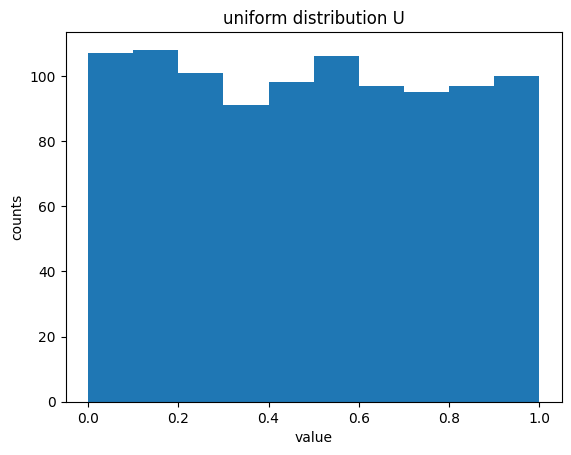

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


uniform_noise = np.random.uniform(size=1000)
plt.hist(uniform_noise)
plt.title("uniform distribution U")
plt.ylabel("counts")
plt.xlabel("value")
plt.show()

Пусть $U_i$ — точка, которую даёт нам генератор равномерно распределенных случайных чисел. Если мы возьмём пару таких таких точек $U_1$, $U_2$ и произведём с ними так называемое [преобразование Бокса-Мюллера](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform), то получим пару новых точек $X$ и $Y$ на вещественной прямой:

$$
\begin{array}{l}
X=\sqrt{-2 \log U_{1}} \cos \left(2 \pi U_{2}\right) \\
Y=\sqrt{-2 \log U_{1}} \sin \left(2 \pi U_{2}\right)
\end{array}
$$

Повторив такую процедуру для большого числа точек $U_i$, можно заметить, что распределение для объектов $X$ и $Y$ становится похожим на стандартное нормальное:

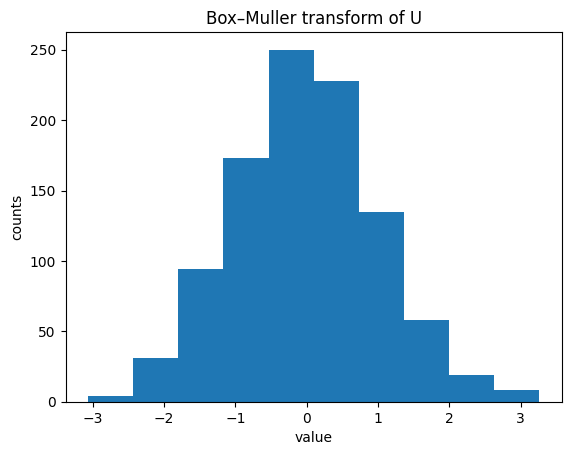

In [ ]:
U1 = np.random.uniform(size=1000)
U2 = np.random.uniform(size=1000)
R = np.sqrt(-2 * np.log(U1))
Theta = 2 * np.pi * U2
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

plt.hist(X)
plt.title("Box–Muller transform of U")
plt.ylabel("counts")
plt.xlabel("value")
plt.show()

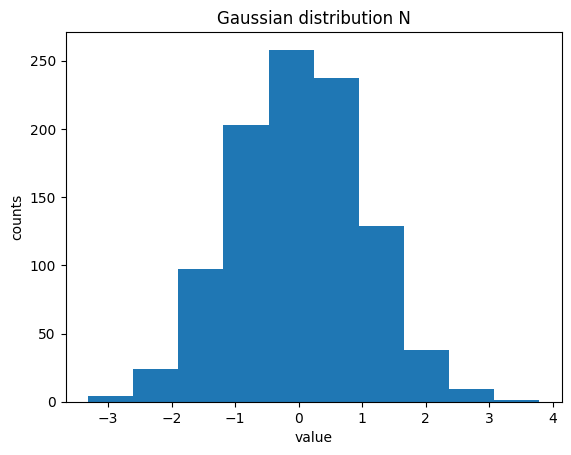

In [ ]:
gaussian_noise = np.random.normal(size=1000)
plt.hist(gaussian_noise)
plt.title("Gaussian distribution N")
plt.ylabel("counts")
plt.xlabel("value")
plt.show()

На самом деле мы можем в точности доказать, что преобразование Бокса-Мюллера преобразовало исходное равномерное распределение в стандартное нормальное:

$$
\begin{array}{l}
X=\sqrt{-2 \log U_{1}} \cos \left(2 \pi U_{2}\right) \\
Y=\sqrt{-2 \log U_{1}} \sin \left(2 \pi U_{2}\right)
\end{array}
$$

Решим уравнение относительно переменных $U_i$:
$$ \large
\begin{array}{l}
U_{1}=e^{-\left(X^{2}+Y^{2}\right) / 2} \\
U_{2}=\frac{1}{2 \pi} \arctan \left(\frac{X}{Y}\right)
\end{array}
$$

Матрица Якоби для такого преобразования:

$$ \large
J(X,Y) = \begin{bmatrix}
\frac{\partial U_1}{\partial X} & \frac{\partial U_1}{\partial Y}\\
\frac{\partial U_2}{\partial X} & \frac{\partial U_2}{\partial Y}
\end{bmatrix} =
\begin{bmatrix}
-X e^{\frac{-(X^2+Y^2)}{2}}  & -Y e^{\frac{-(X^2+Y^2)}{2}}\\
\frac{1}{2\pi} \frac{Y}{X^2 + Y^2} & \frac{1}{2\pi} \frac{-X}{X^2 + Y^2}
\end{bmatrix}
$$

Отсюда имеем:

$$ \large
\begin{aligned}
f_{X,Y}(x,y)&=f_{U_1,U_2}(e^{-\left(X^{2}+Y^{2}\right) / 2}, \frac{1}{2 \pi} \arctan \left(\frac{X}{Y}\right)) |\det(J)|\\
&= |\det(J)|\\
&= \frac{1}{\sqrt{2\pi}}e^{-\frac{X^2}{2}} \frac{1}{\sqrt{2\pi}}e^{-\frac{Y^2}{2}}
\end{aligned}
$$

То есть мы получили пару независимых случайных чисел $X$ и $Y$, каждое из которых лежит в нормальном распределении:
$$
X\perp Y, \quad X \sim \mathcal{N}(0,1),\quad Y\sim \mathcal{N}(0,1)
$$

Что делать, если нам хочется сгенерировать объекты не в стандартном нормальном распределении, а в каком-то более сложном? В общем случае нам необходимо подобрать некоторую функцию, которая будет отображать объекты из известного "простого" распределения в "целевое". Осуществляющие такое преобразование функции будем называть **генеративными моделями**.

Если целевое распределение $\mathcal{F}[\vec {x}]$ известно аналитически, то для подбора такой функции можно воспользоваться различными модификациями алгоритма [Markov Chain Monte Carlo](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo).

<img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/generative_models.png" width="700">

# Генеративные алгоритмы, основанные на глубоком обучении

<img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/deep_generative_models.png" width="700">

# Введение  в генеративно-состязательные нейронные сети

**Эволюция в генерации изображений лиц:**

[Множество примеров различных генераторов](https://thisxdoesnotexist.com)


<img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/faces_generation_quality_progress.png" width="700">

## Latent space

Разберемся с **элементом случайности**. В нейронных сетях мы привыкли к **воспроизводимости** результата: в режиме валидации мы можем несколько раз подать на вход один и тот же объект и получить один и тот результат.  Возникает два вопроса:
- что подавать на **вход** сети для генерации?
- как реализовать **случайность**?

Ответ на оба вопроса: подавать в качестве **входа** вектор **случайного шума**.

<img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/generator_model_pipeline.png" width="700">

Почему именно **вектор**? Почему не одно **случайное число**?

**Ответ**: входной вектор можно рассматривать как **признаки** генерируемого объекта. Каждый такой признак — **независимая случайная величина**. Если мы будем передавать только одно случайное число, то генерация будет однообразной. Чем больше признаков (степеней свободы) у входного вектора, тем разнообразнее будет результат генерации.

То есть случайный шум **большей размерности** даёт нам **больше вариабельности**  для генерации. Это называется **input latent space** — входное латентное пространство.

**Note:** *из-за неустоявшейся терминологии случайное распределение на входе генератора называется латентным пространством так же, как и скрытое пространство в автоэнкодерах. Поэтому в этой лекции будем называть его **входным** латентным пространством. Также в статьях встречается вариант: predefined latent space.*

Каждую компоненту латентного пространства можно рассматривать как отдельную шкалу, вдоль которой изменяются определенные свойства генерируемых объектов. Например, можно выбрать четыре латентных вектора и посмотреть, как генерируемые объекты плавно изменяются при переходе от одного вектора к другому.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L14/input_latent_space_lin_interpol.png" width="600">

<center><em>Линейные интерполяции между четырьмя изображениями в латентном пространстве</em></center>

<center><em>Source: <a href="https://arxiv.org/abs/1803.09093">Comparing Generative Adversarial Network Techniques for Image Creation and Modification(M. Pieters, M. Wiering, 2018)</a></em></center>

### Размерность входного латентного пространства

В выборе размерности входного латентного пространства важно соблюсти  баланс.
- при **низкой размерности** возникнет проблема **низкой вариабельности**.

Пример: генератор лиц с входным вектором длины 1. Результатом работы генератора будет всего одна шкала, вдоль которой будут расположены генерируемые изображения. Скорее всего, генератор выучит наиболее простую и "очевидную" шкалу: от молодой женщины блондинки к пожилому мужчине брюнету. У такой сети будет низкая вариабельность — она не сможет сгенерировать, например, рыжего ребенка в очках.

- при **большой размерности** латентное пространство может быть слишком **разреженным**.

При обучении модели количество точек в этом латентном пространстве будет настолько мало, что в основном пространство будет состоять из пустот. Тогда модель будет крайне некачественно генерировать объекты в точках латентного пространства, далеких от точек обучающей выборки.

Лучший способ выбрать длину вектора — это найти публикацию с похожей задачей и взять значение из нее.

Если такой информации нет, то придется экспериментировать. Лучше начинать с низкой размерности латентного пространства, чтобы наладить работу всей сети, пусть и с низким разнообразием, а затем проводить эксперименты по поиску оптимальной размерности.

Можно использовать собственные знания в предметной области: спросите себя, сколькими вещественными числами можно описать важную информацию об объекте.

### Распределение входных латентных векторов

Как мы знаем из лекции про обучение сети, инициализация весов и нормализация входных данных вносят существенный вклад в работу модели. Поэтому принято использовать **многомерное нормальное распределение** для input latent space. Оно лучше взаимодействует с весами модели и улучшает сходимость.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L14/binomial_distribution.png" width="600"></center>

<center><em>Source: <a href="https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/scatter_hist.html">Двумерное нормальное распределение</a></em></center>

## Наивный подход в решении задачи генерации
(как делать на практике НЕ нужно)

Давайте попробуем создать генератор точек на параболе (cамым тривиальным решением кажется подача случайного шума на вход сети) и будем ожидать на выходе точки параболы. Проверим, как это будет работать.

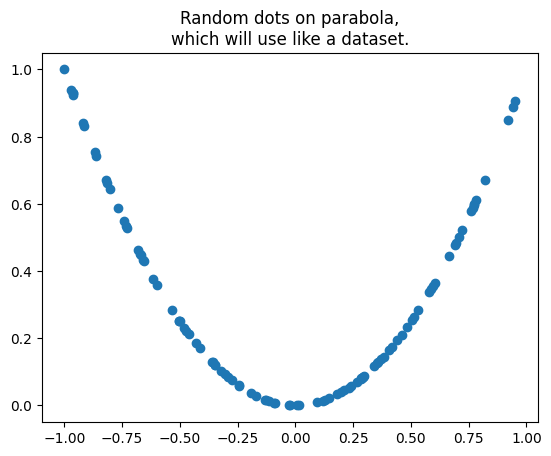

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def gen_pair(num=100):
    x = np.random.uniform(low=-1, high=1, size=(num,))
    y = x * x
    return np.hstack(
        (x.reshape(-1, 1), y.reshape(-1, 1))
    )  # Create num of correct dots(x,y) on parabola


pairs = gen_pair(100)
plt.scatter(pairs[:, 0], pairs[:, 1])
plt.title("Random dots on parabola,\nwhich will use like a dataset.")
plt.show()

Возьмём размерность входного латентного пространства $ls = 1$ и объединим шум с точками в датасеты.

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Define input parameters
n_batches = 10
batch_size = 128
ls = 1  # latent space

# Generate random noise
noise = torch.randn(size=(n_batches * batch_size, ls), dtype=torch.float)
print(f"NN Input: noise.shape: {noise.shape}")

# Generates dots on parabola
xy_pair = gen_pair(num=(n_batches * batch_size))
xy_pair = torch.tensor(xy_pair, dtype=torch.float)
print(f"NN Output: xy_pair.shape: {xy_pair.shape}")

dataset = TensorDataset(noise, xy_pair)  # model inputs, model outputs
trainset, testset = train_test_split(
    dataset, train_size=0.8
)  # split dataset for train and test

train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=True)

NN Input: noise.shape: torch.Size([1280, 1])
NN Output: xy_pair.shape: torch.Size([1280, 2])


Определим простую модель, которая будет ожидать шум на вход и генерировать точки на выходе. (Обратите внимание, что функция активации на последнем слое отсутствует, поскольку мы не ограничиваем наш генератор в каком-то диапазоне.)

In [ ]:
import torch.nn as nn


class GenModel(nn.Module):
    def __init__(self, latent_space):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_space, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 2),
        )  # x,y

    def forward(self, x):
        return self.model(x)

Напишем функцию для оценки loss.

Так как мы не знаем, в каком месте параболы генератор создаст новую точку, то непонятно, с каким элементом из датасета ее сравнивать.

**Вариант №1**

Для сгенерированного $x$ аналитически вычислять $y_{target}=x*x$ и считать разницу между $y$, сгенерированным моделью, и $y_{target}$, вычисленным аналитически:

In [ ]:
def custom_loss(pair, label):
    # All inputs are batches
    x_fake = pair[:, 0]
    y_fake = pair[:, 1]
    return torch.abs(x_fake * x_fake - y_fake).mean()  # average by batch

Это будет работать.

Однако если мы знаем способ точно предсказать выход по входу, то задача уже решена и нейронная сеть не нужна.

**Вариант №2**

Найти в датасете точку  $ target = (x_{target},y_{target})$, наиболее близкую к созданной генератором $ generated = (x,y)$, и использовать расстояние между этими точками в качестве loss.

$$\large Loss = min(dist(target_{i},generated))$$

В пространстве высокой размерности такой поиск будет весьма ресурсозатратным, но в нашем учебном примере работать будет.


In [ ]:
class Loss(nn.Module):
    def __init__(self, targets):
        super().__init__()
        self.targets = targets  # Remember all real samples, impossible in real world

    def forward(self, input, dummy_target=None):
        dist = torch.cdist(input, self.targets)  # claculate pairwise distances (euc.)
        min_dist, index = torch.min(dist, dim=1)  # take the best
        return min_dist.mean()

Вспомогательный код для вывода loss:

In [ ]:
@torch.inference_mode()
def get_test_loss(model, loader):
    test_data = next(iter(loader))
    test_loss = Loss(test_data[1])
    outputs = model(samples.to(device))
    return test_loss(outputs.cpu())

Основной код обучения.

Целевые точки из датасета запоминаются в loss, затем идет обычный цикл обучения.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
num_epochs = 600
model = GenModel(latent_space=ls)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

all_train_targets = next(iter(train_loader))[1]
criterion = Loss(all_train_targets.to(device))

for epoch in range(num_epochs):
    loss_epoch = 0
    for samples, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(samples.to(device))
        loss = criterion(outputs.to(device), labels.to(device))
        loss.backward()
        optimizer.step()
        loss_epoch += loss.item()

    loss_test = get_test_loss(model, test_loader)
    if epoch % 100 == 0:
        print(
            f"Epoch={epoch} train_loss={loss_epoch/len(train_loader):.4} test_loss={loss_test:.4}"
        )

Epoch=0 train_loss=0.05103 test_loss=0.03449
Epoch=100 train_loss=0.004604 test_loss=0.008559
Epoch=200 train_loss=0.004065 test_loss=0.008372
Epoch=300 train_loss=0.002949 test_loss=0.006444
Epoch=400 train_loss=0.004212 test_loss=0.008335
Epoch=500 train_loss=0.002926 test_loss=0.01005


Посмотрим результаты генерации на шуме:

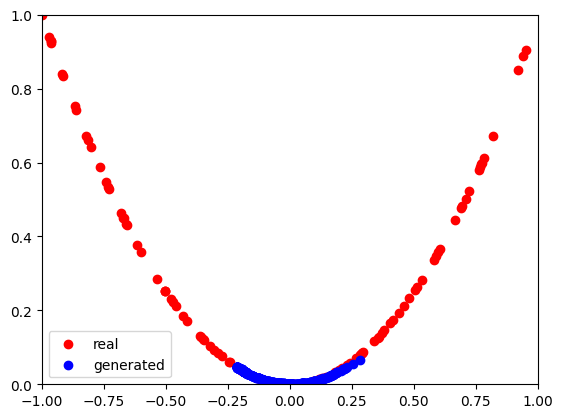

In [ ]:
def test_image(model, pairs, ls=1):
    model.eval().to("cpu")
    noise = torch.tensor(np.random.normal(size=(1000, ls)), dtype=torch.float)
    with torch.no_grad():
        xy_pair_gen = model(noise)

    xy_pair_gen = xy_pair_gen.detach().numpy()
    plt.scatter(pairs[:, 0], pairs[:, 1], color="red", label="real")
    plt.scatter(xy_pair_gen[:, 0], xy_pair_gen[:, 1], color="blue", label="generated")
    plt.axis([-1, 1, 0, 1])
    plt.legend()
    plt.show()
    model.to(device)


test_image(model, pairs)

Видно, что модель генерирует точки, лежащие на параболе, при этом все они лежат в довольно узком интервале по оси х.


Это неудивительно: в loss function мы прописали, что сгенерированная точка должна лежать на параболе, и модель обучилась. А информацию о том, в каких частях кривой должны оказаться точки, мы в loss никак не кодировали.

Более того, модель может научиться хорошо генерировать одну единственную точку, и при этом loss может стать нулевым.


Итак, надо решить две проблемы:


1.   Закодировать в loss условие о том, что точки должны быть различными.
2.   Придумать способ проверки, не требующий перебора всего датасета.



## Дискриминатор

Будем наказывать нейронную сеть не напрямую стандартной loss function, а второй **сетью**, которая определяет, лежит ли сгенерированная точка на параболе.

Создадим сеть-классификатор точек (лежит/не лежит на параболе), которую назовём **дискриминатор** или критик.

In [ ]:
class DisModel(nn.Module):
    def __init__(self, n_points):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 25),
            nn.ReLU(),
            nn.Linear(25, 15),
            nn.ReLU(),
            nn.Linear(15, 1),  # real/fake
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(-1, 2 * n_points)
        return self.model(x)

В общем случае задача дискриминатора — определять, принадлежит ли объект к распределению обучающей выборки.

**Итого** мы имеем:
- **генератор**, выдающий точки, которые могут принадлежать параболе, а могут не принадлежать ей;
- **дискриминатор**, который будет их различать.

Мы будем подавать в **дискриминатор** **правильные точки** (чтобы он знал, как это должно выглядеть) и **точки, которые выдаёт генератор**, считая их подделкой.

Таким образом, **генератор** будет учиться **подражать** реальным данным, а дискриминатор будет учиться **отличать** реальные точки, от подделок.

Мы пришли к идее **генеративно-состязательных** нейронных сетей.

##  Generative adversarial network (GAN)

[2014 Generative Adversarial Networks (Goodfellow et al., 2014)](https://arxiv.org/abs/1406.2661) (**Cited by 33430!!!**)

[Видео разбор оригинальной статьи](https://youtu.be/eyxmSmjmNS0)

[Видео лекции Иана Гудфеллоу](https://www.youtube.com/watch?v=HGYYEUSm-0Q)

**Генеративно-состязательную** сеть описал Иан Гудфеллоу из компании Google (на тот момент) в 2014 году. Сейчас он возглавляет подразделение машинного обучения в Apple. Принцип состязательности в сети **GAN** нередко описывается через метафоры.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/generative_adversarial_network_scheme.png" width="700"></center>

<center><em>Схематичное представление архитектуры GAN </em></center>




### Генератор — фальшивомонетчик!

Еще со времен **AlexNet** мы знаем, что если мы что-то и умеем делать с нейросетями, то это **классификаторы**. В классическом GAN **дискриминатор** выполняет простейшую из задач классификации — **бинарную классификацию** (либо *real*, либо *fake*). А вот задача **генерации** каким-то прямым образом на тот момент решена не была.

Как использовать всю мощь классификатора для создания генератора?

Представим, что есть фальшивомонетчик $G$ (generator) и банкир с прибором для проверки подлинности купюр $D$ (discriminator).

Фальшивомонетчик черпает вдохновение из генератора случайных чисел в виде случайного шума $z$ и создает подделки $G(z)$.

Банкир $D$ получает на вход пачку купюр $x$, проверяет их подлинность и сообщает вектор $D(x)$, состоящий из чисел от нуля до единицы — свою уверенность (вероятность) по каждой купюре в том, что она настоящая. Его цель — выдавать нули для подделок $D(G(z))$ и единицы для настоящих денег $D(x)$. Задачу можно записать как максимизацию произведения $D(x)(1-D(G(z)))$, а произведение, в свою очередь, можно представить как сумму через логарифм.

Таким образом, задача банкира — максимизировать $log(D(x))+log(1-D(G(z)))$.

Цель фальшивомонетчика прямо противоположна — максимизировать $D(G(z))$, то есть убедить банкира в том, что подделки настоящие.

Продолжая аналогию, обучение генератора можно представить так: фальшивомонетчик не просто генерирует подделки наудачу. Он добывает прибор для распознавания подделок, разбирает его, смотрит, как тот работает, и затем создает подделки, которые смогут обмануть этот прибор.

Математически это **[игра](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%D0%B8%D0%B3%D1%80) двух игроков**:

$$\large \min\limits_{\theta_g}  \max\limits_{\theta_d} [\mathbb{E}_{x _\sim p(data)} log(D_{\theta_d}(x)]+\mathbb{E}_{z _\sim p(z)}
[log(1-D_{\theta_d}(G_{\theta_g}(z))]$$



**Дискриминатор**
- обучается при **фиксированном генераторе** ${G}_{\theta_{g}}$,
- **максимизирует** функцию выше относительно $\theta_d$ (**градиентный подъем**),
- решает задачу **бинарной классификации**: старается присвоить $1$ точкам данных из обучающего набора $E_{x∼p_{data}}$ и 0 сгенерированным выборкам $E_{z∼p(z)}$.


**Генератор**
- обучается при **фиксированном дискриминаторе** $D_{θ_d}$,
- получает градиенты весов за счет backpropagation через дискриминатор,
- **минимизирует** функцию выше относительно $\theta_d$ (**градиентный спуск**).

Посредством **чередования** градиентного **подъема** и **спуска** сеть можно обучить.

Градиентный **подъем** на **дискриминаторе**:


$$\large \max\limits_{\theta_d} [\mathbb{E}_{x _\tilde{}p(data)} log(D_{\theta_d}(x)+\mathbb{E}_{z _\tilde{}p(z)} log(1-D_{\theta_d}(G_{\theta_g}(z)))]$$

Градиентный **спуск** на **генераторе**:


$$\large \min\limits_{\theta_g} \mathbb{E}_{z _\tilde{}p(z)} log(1-D_{\theta_d}(G_{\theta_d}(z)))$$

Градиентный **спуск** на **генераторе** эквивалентен градиентному **подъему**

$$\large \max\limits_{\theta_g} \mathbb{E}_{z _\tilde{}p(z)} log(D_{\theta_d}(G_{\theta_d}(z)))$$

В процессе совместного конкурентного обучения, если система достаточно сбалансирована, достигается **минимаксное состояние равновесия**, в котором обе сети эффективно учатся.

Сгенерированные удачно обученной нейросетью изображения практически неотличимы от настоящих.

Если хорошенько подумать, то можно прийти к выводу, что **loss function** в **GAN** — это не какая-то функция, заданная людьми, а еще одна **нейросеть**.

**Преимущества GAN**
* Теоретические **гарантии сходимости**
* Можно обучать обычным **SGD/Adam**
* Решает в явном виде задачу **generative modeling**, но неявным образом (**нейросети**)

**Недостатки GAN**
* **Нестабильное обучение**
* Очень **долгая сходимость**
* **Mode-collapsing** (модель выдает одно и то же изображение или один и тот же класс и т.д., независимо от того, какие входные данные ей подаются)
* **Исчезновение градиента**: дискриминатор настолько хорошо научился отличать сгенерированные образцы от реальных, что градиент весов генератора становится равным 0: в какую сторону бы генератор не изменил свои веса, дискриминатор все равно идеально распознает фальшивки
* Поиск оптимальных параметров — **pure luck**

### GAN Практический пример

Определим наши **генератор** и **дискриминатор**

In [ ]:
class Generator(nn.Module):
    def __init__(self, latent_space, hidden_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_space, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 2),
        )  # x,y

    def forward(self, x):
        return self.model(x)


class Discriminator(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1),  # real/fake
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.model(x)

Определим **входные параметры**

In [ ]:
latent_dim = 10  # latent space
num_epochs = 10000
batch_size = 32

device = torch.device("cuda" if (torch.cuda.is_available()) else "cpu")

Обратите внимание, что у нас так же, как и в первом примере, есть переменная **latent space**. Это тот шум, из которого мы будем генерировать наши точки. Закон сохранения масс в действии — нельзя создать что-то из ничего!

Определим все необходимое для обучения:

In [ ]:
torch.manual_seed(42)
np.random.seed(42)

criterion = nn.BCELoss()  # Loss
gen = Generator(latent_space=latent_dim, hidden_dim=50).to(device)
disc = Discriminator(hidden_dim=50).to(device)

# 2 optimizers for Discriminator and Generator
optimizerD = torch.optim.Adam(disc.parameters(), lr=3e-4)
optimizerG = torch.optim.Adam(gen.parameters(), lr=3e-4)

# Fix noise to compare
fixed_noise = torch.randn(128, latent_dim, device=device)

Обратите внимание, что мы используем `BCELoss` (**Binary Cross Entropy**). Давайте разберемся почему:

- **Дискриминатор** решает задачу **бинарной классификации**. Для этой задачи хорошо подходит **BCE**.
- Требование к генератору может быть сформулировано как "объектам, сгенерированным **генератором**, **дискриминатором** должна быть присвоена **высокая вероятность**". Для **"идеального" генератора**, который всегда генерирует фотореалистичные результаты, значения **$D(G(z))$** всегда должны быть **близки к 1**. Для этой задачи хорошо подходит **BCE**.

Определим функцию, которая создает точки на параболе:

In [ ]:
def gen_pair(num=100):
    x = np.random.uniform(low=-1, high=1, size=(num,))
    y = x * x
    return torch.tensor(
        np.hstack((x.reshape(-1, 1), y.reshape(-1, 1))), dtype=torch.float
    )  # Create num of correct dots(x,y) on parabola

Что сейчас будет происходить? $$$$

* Обучение дискриминатора
    * обнулим градиенты **дискриминатора**
    * real точки
        * создадим набор **real точек**, которые лежат на параболе
        * посчитаем значение функции потерь дискриминатора на **real точках** и **real метках** $\text{loss D}_\text{real}$
        * посчитаем градиенты для **дискриминатора**



<img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/gan_training_algorithm_1.png" width="1000">

* Обучение дискриминатора (продолжение)
 * fake точки
   * сгенерируем случайный шум $z$
   * возьмем наш не обученный **генератор** и создадим с его помощью **fake точки** из $z$
   * посчитаем значение функции потерь дискриминатора на **fake точках** и **fake метках** $\text{loss D}_\text{fake}$
   * посчитаем градиенты для **дискриминатора** (они сложатся с уже посчитанными ранее)
 * обновление весов
   * сделаем шаг обучения **дискриминатора** (обновим его веса)
   * **генератор** не обучается



<img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/gan_training_algorithm_2.png" width="1000">

* Обучение генератора
 * обнулим градиенты **генератора**
 * сгенерируем случайный шум $z$
 * создадим с помощью **генератора** набор **fake точек** из $z$
 * посчитаем значение функции потерь дискриминатора на **fake точках** и **real метках** $\text{loss G}$ (подмена меток)
 * посчитаем градиенты для **генератора**
 * сделаем шаг обучения **генератора** (обновим его веса)
 * **дискриминатор** не обучается

<img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/gan_training_algorithm_3.png" width="1000">

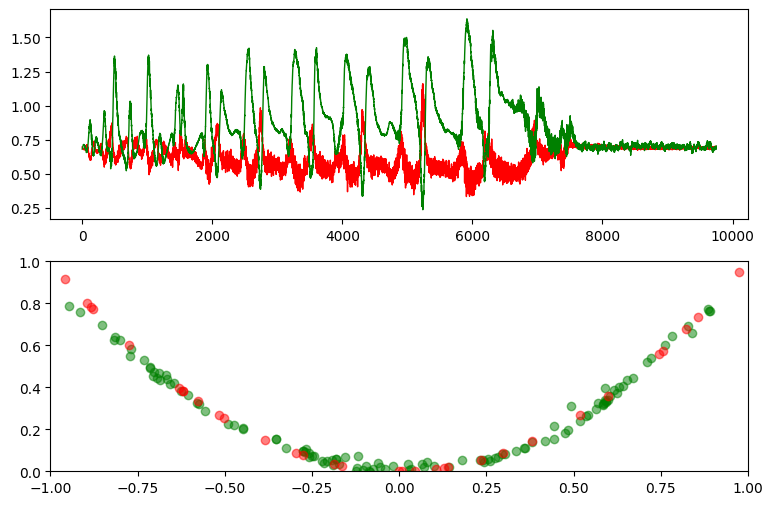

In [ ]:
from IPython import display
from IPython.display import clear_output

real_label = 1
fake_label = 0

# Main Training Loop
print("Training...")
print(device)

x = []
y_D = []
y_G = []
for epoch in range(num_epochs):
    # max log(D(x)) + log(1 - D(G(z)))
    # train on real points
    disc.zero_grad()

    # Define real points
    real_points = gen_pair(num=batch_size).to(device)
    label = torch.full(
        (batch_size,), real_label, dtype=torch.float, device=device
    ).view(-1)

    # Train disc on real_points
    output = disc(real_points).view(-1)
    errD_real = criterion(output, label)
    errD_real.backward()

    # Define fake points
    # This dots generated by generator transform from latent space
    noise = torch.randn(batch_size, latent_dim, device=device)
    fake_points = gen(noise)
    label.fill_(fake_label)

    # Train disc on fake_points
    output = disc(fake_points.detach()).view(-1)
    errD_fake = criterion(output, label)
    errD_fake.backward()

    # Discriminator loss(real+fake)
    errD = errD_real + errD_fake

    optimizerD.step()

    # max log(D(G(z)))
    # Now, train generator
    gen.zero_grad()

    # Let's tell the discriminator that our generator creates real points
    label.fill_(real_label)

    output = disc(fake_points).view(-1)

    errG = criterion(output, label)

    errG.backward()

    optimizerG.step()

    # Plotting every N epoch
    x.append(epoch)
    y_D.append(errD.item() / 2)
    y_G.append(errG.item())

    if epoch % 250 == 0:
        fig, ax = plt.subplots(nrows=2, figsize=(9, 6))
        ax[0].plot(x, y_D, color="red", lw=1, label="D")
        ax[0].plot(x, y_G, color="green", lw=1, label="G")

        # Generates dots from fixed_noise
        fake_points = gen(fixed_noise)
        ax[1].scatter(
            fake_points.detach().to("cpu")[:, 0],
            fake_points.detach().to("cpu")[:, 1],
            color="green",
            alpha=0.5,
        )
        ax[1].scatter(
            real_points.detach().to("cpu")[:, 0],
            real_points.detach().to("cpu")[:, 1],
            color="red",
            alpha=0.5,
        )
        ax[1].set_xlim(-1, 1)
        ax[1].set_ylim(0, 1)
        clear_output(wait=True)
        display.display(plt.gcf())
        plt.close()

**Класс!** У нас получилось (если вдруг не сошлось за 10000 эпох, перезапустите заново, к сожалению, **фиксация seed еще не гарантирует стабильность GAN**). Особенно круто смотреть, как красиво loss **дискриминатора** и **генератора** сходятся.

## DCGAN — Генерация изображений

С помощью **GAN** можно, разумеется, генерировать не только точки на параболе. Можно генерировать, например, изображения. Но появляются закономерные вопросы.

### Как из шума на входе сети получить изображение?

Самым простым ответом будет: взять шум, пропустить его через **полносвязные слои** и сделать **reshape** до нужного разрешения. В целом, это будет работать.


Однако **DCGAN (Deep Convolutional GAN)** использует **сверточные** и **сверточно-транспонированные** (*convolutional* и *convolutional-transpose*) слои в дискриминаторе и генераторе соответственно. Впервые метод **DCGAN** был описан в статье [Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks (Radford et al., 2015)](https://arxiv.org/abs/1511.06434).

<center><img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/deep_convolutional_gan_scheme.png" width="700"></center>
<center><em>Схема работы DCGAN (Radford et al., 2015).</em></center>

Ниже видна разница в генерации при помощи исключительно **полносвязных слоёв** и при помощи **обратных свёрток**. Очевидно, результат **DCGAN** лучше, чем **GAN**.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L14/gan_dcgan_mnist_examples.png" width="600"></center>
<center><em>Сравнение результатов на MNIST (Radford et al., 2015)</em></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1511.06434.pdf">	Unsupervised representation learning with deep convolutional generative adversarial networks</a></em></center>

### Архитектура DCGAN

На вход генератора подают шум для создания разнообразных объектов. Этот шум представляет собой вектор в многомерном пространстве. Один вектор — один сгенерированный объект. Задача дискриминатора — преобразовать вектор в изображение.

Такое преобразование возможно при помощи транспонированных сверточных (convolution-transpose, иногда называют fractionally strided convolution) слоев. Как и обычные сверточные слои, эти слои используют сверточные ядра, но перед вычислением сверток они увеличивают размер исходного изображения, "раздвигая" пиксели и заполняя образующиеся промежутки между пикселями нулями.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/dcgan_architecture.png" width="700"></center>
<center><em>Зеркальная архитектура DCGAN </em></center>

### Transposed Convolution Layer

Давайте кратко вспомним, что делают TC слои.

Transposed convolution проходит по всем пикселям входа и умножает их на обучаемое ядро свертки. При этом каждый одиночный пиксель превращается в фрагмент. Там, где фрагменты накладываются друг на друга, значения попиксельно суммируются.

Используя Transposed convolution с параметром `stride = 2`, можно повышать размер карты признаков приблизительно в два раза, добавляя на нее мелкие детали.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/transposed_convolution_explained.png" width="1024"></center>

<center><em>Transposed convolution</em></center>

In [ ]:
x = torch.rand((1, 3, 10, 10)) * 255  # one 3-channel image with 10x10 size
print(x.shape)

torch.Size([1, 3, 10, 10])


In [ ]:
convT = nn.ConvTranspose2d(in_channels=3, out_channels=3, kernel_size=3)
y = convT(x)
print(y.shape)  # One 3-chanells image with 12x12 size

torch.Size([1, 3, 12, 12])


Полученное изображение не похоже на входное, потому что были применены свёрточные ядра со случайными коэффициентами.

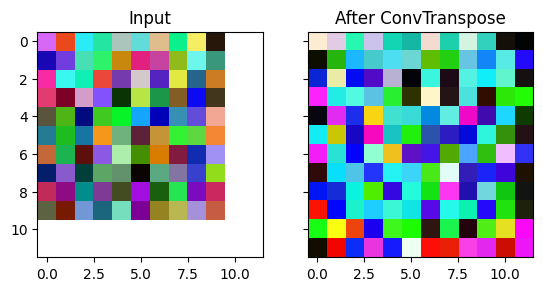

In [ ]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].imshow(x[0].permute(1, 2, 0).detach().numpy().astype(np.uint8))
ax[1].imshow(y[0].permute(1, 2, 0).detach().numpy().astype(np.uint8))
ax[0].set_title("Input")
ax[1].set_title("After ConvTranspose")
plt.show()

### Другие способы повышения разрешения — Upsampling

Помимо **обратных свёрток** существуют другие методы повышения разрешения из низкой размерности.

Самый простой способ — выполнить повышение разрешения с помощью **интерполяции**. Давайте вспомним, что в PyTorch это осуществляется слоем [Upsample](https://pytorch.org/docs/stable/generated/torch.nn.Upsample.html)



In [ ]:
x = torch.rand((1, 3, 10, 10))  # one 3-channal image with 10x10 size
print("Input shape:", x.shape)

upsample = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=False)
y = upsample(x)

print("Output shape", y.shape)

Input shape: torch.Size([1, 3, 10, 10])
Output shape torch.Size([1, 3, 20, 20])


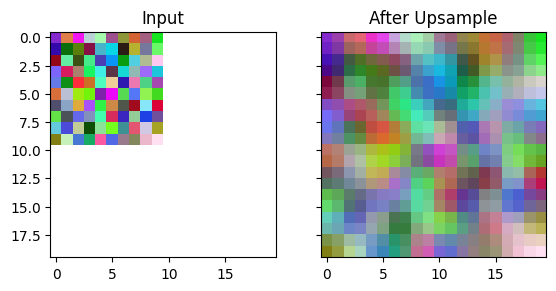

In [ ]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].imshow((x[0].permute(1, 2, 0) * 256).detach().numpy().astype(np.uint8))
ax[1].imshow((y[0].permute(1, 2, 0).detach().numpy() * 256).astype(np.uint8))
ax[0].set_title("Input")
ax[1].set_title("After Upsample")
plt.show()

### Пример обученного DCGAN

Давайте посмотрим на пример обученного **DCGAN**

In [ ]:
use_gpu = True if torch.cuda.is_available() else False
model = torch.hub.load(
    "facebookresearch/pytorch_GAN_zoo:hub", "DCGAN", pretrained=True, useGPU=use_gpu
)
clear_output()

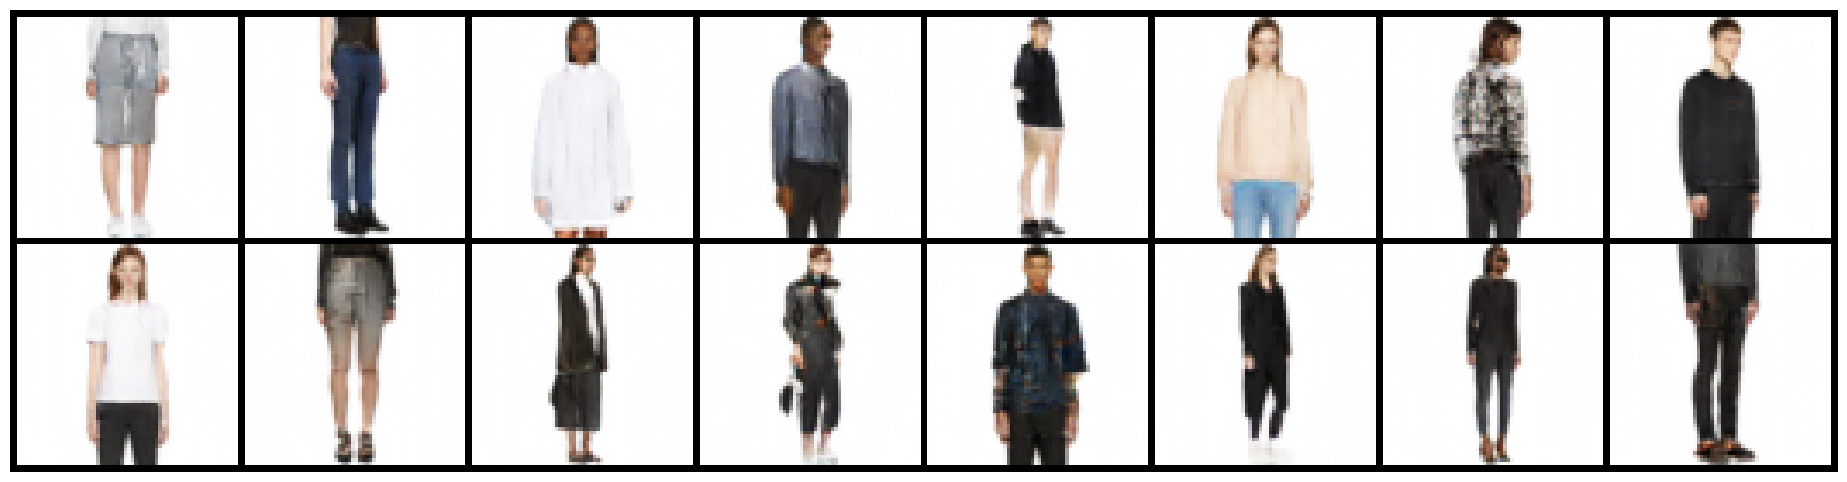

In [ ]:
import torchvision


num_images = 16
noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise)
    generated_images = (
        generated_images.clamp(-1, 1) + 1
    ) / 2.0  # normalization to 0..1 range

fig, ax = plt.subplots(figsize=(16 * 3, 2 * 3))
ax.imshow(
    torchvision.utils.make_grid(generated_images).permute(1, 2, 0).cpu().numpy(),
    interpolation="nearest",
    aspect="equal",
)
ax.axis("off")
plt.show()

### Практический пример DCGAN

Теперь давайте попробуем сами написать свой **DCGAN** и обучить его на датасете **FashionMNIST**

In [ ]:
num_epochs = 2  # Num of epochs
batch_size = 64  # batch size
lr = 2e-4  # Learning rate
b1 = 0.5  # Adam: decay of first order momentum of gradient
b2 = 0.999  # Adam: decay of first order momentum of gradient
num_cpu = 8  # Num of cpu threads to generate batch
latent_dim = 100  # latent space
img_size = 32  # images size
channels = 1  # Num of channels
sample_interval = 450  # interval between image sampling

Обычно мы **инициализируем веса** случайным образом, но ничто не мешает нам инициализировать их так, как мы хотим. В [оригинальной статье](https://arxiv.org/pdf/1511.06434.pdf) про **DCGAN** предложено инициализировать веса нормальным распределением с центром в нуле и стандартным отклонением 0,02:

In [ ]:
def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)

Обратите внимание, как преобразуется **шум** в **генераторе**:
* Сначала с помощью **полносвязного слоя** он преобразуется в **первичные фичи**
* Потом с помощью функции **view** **ресэмплится** в картинку низкого разрешения
* Потом при прохождении через **conv_blocks** к нему поочерёдно применяются **Upsample** и **ОБЫЧНЫЕ** свёртки

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.init_size = img_size // 4
        self.l1 = nn.Sequential(nn.Linear(latent_dim, 128 * self.init_size**2))

        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),
            nn.BatchNorm2d(128, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, channels, 3, stride=1, padding=1),
            nn.Tanh(),
        )

    def forward(self, z):
        out = self.l1(z)
        out = out.view(out.shape[0], 128, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        def discriminator_block(in_filters, out_filters, bn=True):
            block = [
                nn.Conv2d(in_filters, out_filters, 3, 2, 1),
                nn.LeakyReLU(0.2, inplace=True),
                nn.Dropout2d(0.25),
            ]
            if bn:
                block.append(nn.BatchNorm2d(out_filters, 0.8))
            return block

        self.model = nn.Sequential(
            *discriminator_block(channels, 16, bn=False),
            *discriminator_block(16, 32),
            *discriminator_block(32, 64),
            *discriminator_block(64, 128),
        )

        # The height and width of downsampled image
        ds_size = img_size // 2**4
        self.adv_layer = nn.Sequential(nn.Linear(128 * ds_size**2, 1), nn.Sigmoid())

    def forward(self, img):
        out = self.model(img)
        out = out.view(out.shape[0], -1)
        validity = self.adv_layer(out)

        return validity

In [ ]:
device = torch.device("cuda" if (torch.cuda.is_available()) else "cpu")

# Initialize Generator and Discriminator
generator = Generator()
discriminator = Discriminator()

# Initialize weight
generator.apply(weights_init_normal)
discriminator.apply(weights_init_normal)

# Define loss
criterion = nn.BCELoss()

generator.to(device)
discriminator.to(device)
criterion.to(device)

BCELoss()

Напишем функцию для отображения изображений

In [ ]:
from torchvision.utils import make_grid


def show_gen_img(model, latent_dim=100):
    z = Tensor(np.random.normal(0, 1, (9, latent_dim)))  # define latent dim

    # Generate noise from latent dim
    sample_images = generator(z)
    sample_images = sample_images.cpu().detach()

    # Plotting images
    grid = (
        make_grid(sample_images, nrow=3, ncols=3, normalize=True)
        .permute(1, 2, 0)
        .numpy()
    )
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(grid)
    plt.axis("off")
    return fig

Подгрузим данные и загрузим и их в Data Loader

In [ ]:
import os
from torchvision import datasets, transforms

os.makedirs("../../data/mnist", exist_ok=True)
data_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        "../../data/mnist",
        train=True,
        download=True,
        transform=transforms.Compose(
            [
                transforms.Resize(img_size),
                transforms.ToTensor(),
                transforms.Normalize([0.5], [0.5]),
            ]
        ),
    ),
    batch_size=batch_size,
    shuffle=True,
)
clear_output()

[Epoch 0/2] [Batch 0/938] [D loss: 0.693183] [G loss: 0.697421]


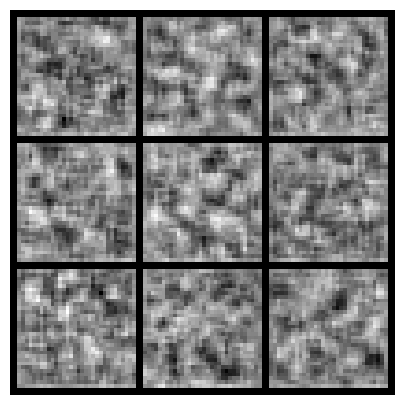

[Epoch 0/2] [Batch 450/938] [D loss: 0.689533] [G loss: 0.741189]


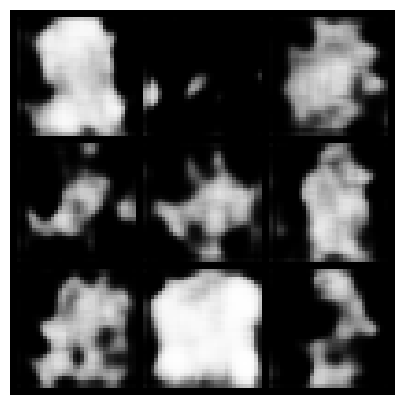

[Epoch 0/2] [Batch 900/938] [D loss: 0.640673] [G loss: 0.859734]


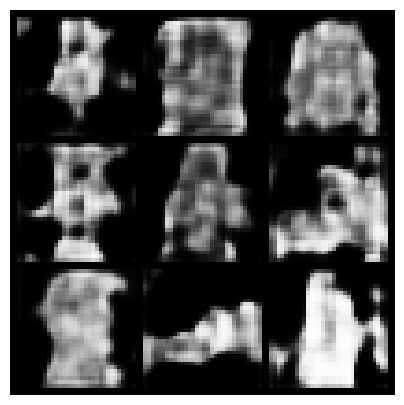

[Epoch 1/2] [Batch 412/938] [D loss: 0.633906] [G loss: 0.818824]


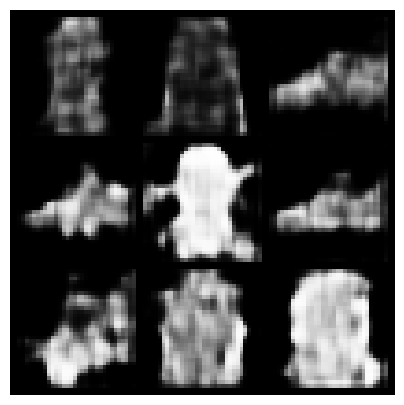

[Epoch 1/2] [Batch 862/938] [D loss: 0.672962] [G loss: 0.855835]


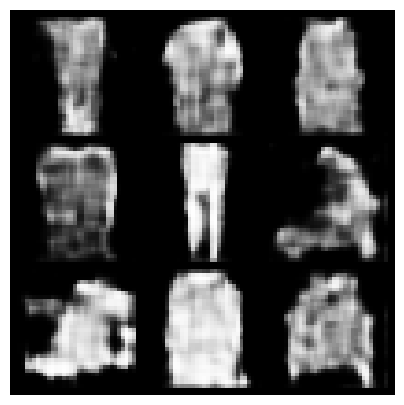

In [ ]:
# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

Tensor = torch.cuda.FloatTensor

for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(data_loader):
        # Adversarial ground truths
        valid = Tensor(imgs.shape[0], 1).fill_(1.0)
        fake = Tensor(imgs.shape[0], 1).fill_(0.0)

        # Configure input
        real_imgs = imgs.type(Tensor)

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()

        # Sample noise as generator input
        z = Tensor(np.random.normal(0, 1, (imgs.shape[0], latent_dim)))

        # Generate a batch of images
        gen_imgs = generator(z)

        # Loss measures generator's ability to fool the discriminator
        g_loss = criterion(discriminator(gen_imgs), valid)

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Measure discriminator's ability to classify real from generated samples
        real_loss = criterion(discriminator(real_imgs), valid)
        fake_loss = criterion(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        batches_done = epoch * len(data_loader) + i
        if batches_done % sample_interval == 0:
            print(
                "[Epoch %d/%d] [Batch %d/%d] [D loss: %f] [G loss: %f]"
                % (epoch, num_epochs, i, len(data_loader), d_loss.item(), g_loss.item())
            )
            fig = show_gen_img(generator)
            plt.show()

Чтобы картинки обрели приличный вид, хватает 2 эпох. Чтобы стали выглядеть хорошо — 5 эпох.

## cGAN — GAN с условием

**cGAN** расшифровывается как **Conditional Generative Adversarial Net** — это **GAN** с условием. Условие может быть любым, например, генерация конкретной цифры. В этом случае нам нужен уже размеченный датасет для того, чтобы обучить дискриминатор.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/conditional_gan_scheme.png" width="800"></center>
<center><em>Схема работы cGAN. Label Y добавляется к случайному шуму, тем самым мы говорим генератору генерировать случайное изображение нужного класса. Также он подаётся в дискриминатор в качестве входа, чтобы дискриминатор знал, какое изображение классифицировать как реальное, а какое — как вымышленное.</em></center>

Обучение в данном случае будет аналогичным обучению **GAN**: мы будем обучать сети, чередуя реальные данные и сгенерированные, добавив `label`.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L14/cGANS_results_20_and_50_epochs_mnist.png" width="700"></center>
<center><em>Сравнение результатов cGAN и cDCGAN</em></center>

<center><em>Source: <a href="https://github.com/znxlwm/pytorch-MNIST-CelebA-cGAN-cDCGAN">PyTorch implementation of conditional Generative Adversarial Networks</a></em></center>



### Как закодировать метки?

Поскольку подавать в сеть числа от 0 до 9 (в случае **MNSIT**) нет смысла, то нужно придумать, как подавать их в нейронную сеть. На помощь приходят **Embeddings**. Мы можем представить каждую метку в виде вектора с десятью элементами.

[Документация nn.Embedding](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)

In [ ]:
samples, labels = next(iter(data_loader))

label_emb = nn.Embedding(10, 10)

e = label_emb(labels)

print(f"Label: {labels[0]}")
print(f"Embedding for this label: {e[0]}")

Label: 6
Embedding for this label: tensor([-0.7364,  0.5600,  0.0687,  0.0613, -1.9721,  0.8849, -1.2226,  0.3140,
        -1.0129,  0.9434], grad_fn=<SelectBackward0>)


После этого **эмбеддинги** меток обычно склеиваются с входами сетей.

#### Почему нельзя подать просто число?

Если мы будем подавать просто число, например 0.1 для единицы и 0.5 для пяти, то вход у нас будет непрерывным, что довольно нелогично: тогда при небольшом изменении входа мы будем генерировать другую цифру. А также сети будет сложнее выучить небольшие расхождения в этом небольшом интервале. В случае с векторным представлением мы избегаем этих проблем.

#### Модификации cGAN

Метки классов можно подавать не только способом, описанным выше. Можно вместо подачи их в дискриминатор сделать так, чтобы он их предсказывал — **Semi-Supervised GAN**.

Или же не подавать label в дискриминатор, но ждать от него классификации в соответствии с классом, который мы хотим получить от генератора — это **InfoGAN**

Ещё одна модификация cGAN — это **AC-GAN** (auxiliary classifier), в которой единственное различие заключается в том, что дискриминатор должен помимо распознавания реальных и фейковых изображений ещё и классифицировать их. Он имеет эффект стабилизации процесса обучения и позволяет генерировать большие высококачественные изображения, изучая представление в скрытом пространстве, которое не зависит от метки класса.

<img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/gans_zoo_schemes.png" width="900">

## Тонкости обучения GANов

[Статья — детальный разбор тонкностей и советов](https://beckham.nz/2021/06/28/training-gans.html)

### Частые/простые ошибки

* **Убедитесь, что сгенерированые сэмплы находятся в том же диапазоне, что и реальные данные.** Например, реальные данные `[-1,1]`, при этом генерируются данные `[0,1]`. Это нехорошо, так как это подсказка для дискриминатора.
* **Убедитесь, что сгенерированные сэмплы того же размера, что и реальные данные.** Например, размер картинок в MNIST `(28,28)`, а генератор выдает `(32,32)`. В таком случае нужно либо изменить архитектуру генератора, чтобы получать на выходе размер `(28,28)`, либо сделать ресайз реальных данных до `(32,32)`.
* **Старайтесь не использовать `BatchNorm`**. Проблема `BN` в том, что во время обучения его внутренняя статистика считается по минибатчу, а во время инференса она вычисляется как *moving average*, что в свою очередь может повлечь непредсказуемые результаты. Если архитектура GAN предполагает нормализацию, то лучше использовать **`InstanceNorm`**.
* **Визуализируйте свои лоссы в процессе обучения**. Для этого существует множество прекрасных библиотек (например, TensorBoard). Следить за бегущими по экрану цифрами от двух соревнующихся между собой лоссов бессмысленно.



### Зачем давать преимущество дискриминатору

Если ваша версия **GAN** работает не так хорошо, как вам хотелось бы, попробуйте дать своему **дискриминатору** преимущество, обучив его на относительно большее число итераций, чем **генератор**. Другими словами, чем лучше **дискриминатор** различает настоящие и фальшивые данные, тем лучше сигнал, который **генератор** может извлечь из него. Обратите внимание, что эта логика не имела смысла во времена "до WGAN", поскольку слишком хорошая работа дискриминатора вредила обучению.

Например:


```
def train_on_batch(x, iter_, n_gen=5):
     Generator:
    ...
    ...
    if iter_ % n_gen == 0:
        g_loss.backward()
        opt_g.step()

     Discriminator:
    ...
    ...
    d_loss.backward()
    d_loss.step()
```

Где `iter_` — текущая итерация шага градиента, а `n_gen` определяет интервал между обновлениями генератора. В данном случае, поскольку он равен 5, мы можем считать, что это означает, что дискриминатор обновляется в 5 раз чаще, чем генератор.

Естественно, работает не всегда и не везде. Но попробовать стоит


### Использование оптимизатора ADAM

Можно обратить внимание, что почти во всех статьях по **GAN** используется **ADAM**. Сложно сказать, почему так получается, но он работает, и работает очень хорошо. Если качество вашего **GAN** оставляет желать лучшего, скорее всего оптимизатор тут не при чем. Ищите ошибку где-то еще.

Параметр `epsilon` **ADAM** по умолчанию в PyTorch равен `1e-8`, что может вызвать проблемы после длительного периода обучения, например, значения функции потерь периодически взрываются или увеличиваются. Подробнее об этом на [StackOverflow](https://stackoverflow.com/questions/42327543/adam-optimizer-goes-haywire-after-200k-batches-training-loss-grows) и в комментарии на [Reddit](https://www.reddit.com/r/reinforcementlearning/comments/j9rflf/intuitive_explanation_for_adams_epsilon_parameter/).

# Диффузионные модели

Базовая [публикация](https://arxiv.org/abs/2006.11239) по теме.

## Прямой диффузный процесс

Пусть мы имеем некоторый объект $\mathbf{x}_0$ из заданного имеющимся датасетом распределения $\mathbf{x}_0 \sim q(\mathbf{x})$. Определим так называемый прямой диффузный процесс, в ходе которого мы будем последовательно добавлять небольшое количество Гауссового шума последовательно $T$ раз, создавая из нашего объекта последовательность $\mathbf{x}_1, \dots, \mathbf{x}_T$ постепенно всё более зашумленных версий нашего исходного объекта. Параметры добавляемого шума зависят от номера шага зашумления и их набор $\{\beta_t \in (0, 1)\}_{t=1}^T$ задан заранее.

<img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/diffusion_process.png" width="900">

Исходное распределение данных из датасета будет последовательно преобразовано в Гауссов шум:

$$\large q(\mathbf{x}_t \vert \mathbf{x}_{t-1}) = \mathcal{N}(\mathbf{x}_t; \sqrt{1 - \beta_t} \mathbf{x}_{t-1}, \beta_t\mathbf{I}) \quad
q(\mathbf{x}_{1:T} \vert \mathbf{x}_0) = \prod^T_{t=1} q(\mathbf{x}_t \vert \mathbf{x}_{t-1})$$

Важным свойством описанного выше процесса является то, что он допускает аналитическое вычисление шума на любом из шагов процесса в явном виде. Это связано с тем, что сумма нескольких нормально распределенных случайных величин также является случайной величиной с нормальным распределением. Введём обозначения из оригинальной статьи $\bar{\alpha}_t = \prod_{i=1}^t \alpha_i$ и $\alpha_t = 1 - \beta_t$. Тогда:

$$ \large
\begin{aligned}
\mathbf{x}_t
&= \sqrt{\alpha_t}\mathbf{x}_{t-1} + \sqrt{1 - \alpha_t}\boldsymbol{\epsilon}_{t-1} \\
&= \sqrt{\alpha_t \alpha_{t-1}} \mathbf{x}_{t-2} + \sqrt{1 - \alpha_t \alpha_{t-1}} \bar{\boldsymbol{\epsilon}}_{t-2} \\
&= \dots \\
&= \sqrt{\bar{\alpha}_t}\mathbf{x}_0 + \sqrt{1 - \bar{\alpha}_t}\boldsymbol{\epsilon} \\
\end{aligned} $$

$$ \large
\begin{aligned}
q(\mathbf{x}_t \vert \mathbf{x}_0) &= \mathcal{N}(\mathbf{x}_t; \sqrt{\bar{\alpha}_t} \mathbf{x}_0, (1 - \bar{\alpha}_t)\mathbf{I})
\end{aligned}; $$

$\large \text{где } \boldsymbol{\epsilon}_{t-1}, \boldsymbol{\epsilon}_{t-2}, \dots \sim \mathcal{N}(\mathbf{0}, \mathbf{I}),$

$\large \qquad \bar{\boldsymbol{\epsilon}}_{t-2} \text{ – новая нормально распределенная величина (*)}.$

(*)  Напомним, что когда мы складываем две нормально распределенные величины с разной дисперсией и нулевым средним $\mathcal{N}(\mathbf{0}, \sigma_1^2\mathbf{I})$ и $\mathcal{N}(\mathbf{0}, \sigma_2^2\mathbf{I})$, то получаем новую нормально распределенную случайную величину $\mathcal{N}(\mathbf{0}, (\sigma_1^2 + \sigma_2^2)\mathbf{I})$, что в нашей параметризации означает $\sqrt{(1 - \alpha_t) + \alpha_t (1-\alpha_{t-1})} = \sqrt{1 - \alpha_t\alpha_{t-1}}$

## Обратный диффузный процесс

$$\large p_\theta(\mathbf{x}_{0:T}) = p(\mathbf{x}_T) \prod^T_{t=1} p_\theta(\mathbf{x}_{t-1} \vert \mathbf{x}_t) \quad
p_\theta(\mathbf{x}_{t-1} \vert \mathbf{x}_t) = \mathcal{N}(\mathbf{x}_{t-1}; \boldsymbol{\mu}_\theta(\mathbf{x}_t, t), \boldsymbol{\Sigma}_\theta(\mathbf{x}_t, t))$$

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L14/diffusion_example.png" width="700"></center>

<center><em>Source: <a href="https://lilianweng.github.io/posts/2021-07-11-diffusion-models">Lilian Weng: What are Diffusion Models?</a></em></center>

## Denoising U-Net

<img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/resnet_block.png" width="700">

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class ResNetBlock(nn.Module):
    def __init__(self, in_features, out_features, mid_features=None, residual=False):
        super().__init__()
        self.residual = residual
        if not mid_features:
            mid_features = out_features
        self.conv_stack = nn.Sequential(
            nn.Conv2d(in_features, mid_features, kernel_size=3, padding=1, bias=False),
            nn.GroupNorm(1, mid_features),
            nn.GELU(),
            nn.Conv2d(mid_features, out_features, kernel_size=3, padding=1, bias=False),
            nn.GroupNorm(1, out_features),
        )

    def forward(self, x):
        if self.residual:
            return F.gelu(x + self.conv_stack(x))
        else:
            return self.conv_stack(x)

Блок уменьшения размера:

<img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/down_block.png" width="650">

Блок увеличения размера:

<img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/upblock.png" width="900">

In [ ]:
import torch


class ResizeBlock(nn.Module):
    def __init__(self, in_features, out_features, emb_dim):
        super().__init__()
        # defines non-linear map from time embedding features to conv features
        self.emb_projection = nn.Sequential(
            nn.SiLU(),
            nn.Linear(emb_dim, out_features),
        )

    def add_emb(self, x, t_vector):
        # [batch_size, time_embedding_dim] -> [batch_size, out_features]
        emb = self.emb_projection(t_vector)
        # [batch_size, out_features] - > [batch_size, out_features, H, W]
        emb = emb[:, :, None, None].repeat(1, 1, x.shape[-2], x.shape[-1])
        return x + emb

    def forward(self, x):
        pass


class Down(ResizeBlock):
    def __init__(self, in_features, out_features, emb_dim=256):
        super().__init__(in_features, out_features, emb_dim)
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            ResNetBlock(in_features, in_features, residual=True),
            ResNetBlock(in_features, out_features),
        )

    def forward(self, x, t):
        x = self.maxpool_conv(x)
        x = self.add_emb(x, t)
        return x


class Up(ResizeBlock):
    def __init__(self, in_features, out_features, emb_dim=256):
        super().__init__(in_features, out_features, emb_dim)

        self.up = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        self.conv = nn.Sequential(
            ResNetBlock(in_features, in_features, residual=True),
            ResNetBlock(in_features, out_features, in_features // 2),
        )

    def forward(self, x, skip_x, t):
        x = self.up(x)
        x = torch.cat([skip_x, x], dim=1)
        x = self.conv(x)
        x = self.add_emb(x, t)
        return x

<img src ="https://edunet.kea.su/repo/EduNet-content/L14/out/se_block.png" width="900">

In [ ]:
class SelfAttention(nn.Module):
    def __init__(self, channels, size):
        super().__init__()
        self.channels = channels
        self.size = size
        self.mha = nn.MultiheadAttention(channels, num_heads=4, batch_first=True)
        self.ln = nn.LayerNorm([channels])
        self.mlp = nn.Sequential(
            nn.LayerNorm([channels]),
            nn.Linear(channels, channels),
            nn.GELU(),
            nn.Linear(channels, channels),
        )

    def forward(self, x):
        # [batch_size, C, H, W] -> [batch_size, H*W, C]
        x = x.view(-1, self.channels, self.size * self.size).swapaxes(1, 2)
        x_ln = self.ln(x)
        # K, Q, V in Self attention are equal
        attention_value, _ = self.mha(x_ln, x_ln, x_ln)
        # skip connection
        attention_value = attention_value + x
        # simple multilayer perceptron and second skip connection
        attention_value = self.mlp(attention_value) + attention_value
        # back to [batch_size, C, H, W]
        return attention_value.swapaxes(2, 1).view(
            -1, self.channels, self.size, self.size
        )

In [ ]:
class UNet(nn.Module):
    r"""
    Denoising U-Net model implementation based on arXiv:2006.11239 [cs.LG]
    """

    def __init__(self, num_channels=3, img_size=64, time_enbed_dim=256):
        super().__init__()
        self.num_channels = num_channels
        self.time_dim = time_enbed_dim
        self.img_size = img_size

        # Downsample and enlarge feature dim
        self.inc = ResNetBlock(num_channels, 64)
        self.down1 = Down(64, 128)
        self.sa1 = SelfAttention(128, img_size // 2)
        self.down2 = Down(128, 256)
        self.sa2 = SelfAttention(256, img_size // 4)
        self.down3 = Down(256, 256)
        self.sa3 = SelfAttention(256, img_size // 8)

        # Keep spatial dim constant
        self.conv_bottleneck = nn.Sequential(
            ResNetBlock(256, 512),
            SelfAttention(512, img_size // 8),
            ResNetBlock(512, 256),
        )

        # Upsample and reduce feature dim
        # 512=256+256 from conv_bottleneck and sa3
        self.up1 = Up(512, 128)
        self.sa4 = SelfAttention(128, img_size // 4)
        # 256=128+128 from sa4 and sa2
        self.up2 = Up(256, 64)
        self.sa5 = SelfAttention(64, img_size // 2)
        # 128=64+64 from sa5 and sa1
        self.up3 = Up(128, 64)
        self.sa6 = SelfAttention(64, img_size)
        self.outc = nn.Conv2d(64, num_channels, kernel_size=1)

    def pos_encoding(self, t):
        r"""
        Returns embedding vector for given integer time index.

        We adopt 1d Positional Encoding form arXiv:1706.03762 [cs.CL]
        see 3.5 for more details.

        PE(x,2i) = sin(x/10000^(2i/D))
        PE(x,2i+1) = cos(x/10000^(2i/D))

        Where:
        x is a point in 1d space
        i is an integer in [0, D/2), where D is the size of the feature dimension

        Args:
            t: Tensor, shape ``[batch_size, 1]``
        Returns:
            pe: Tensor, shape ``[batch_size, time_embedding_dim]``
        """

        # placeholder for diffusion time encoding vector
        pe = torch.zeros(t.shape[0], self.time_dim).to(t)

        # factor 1/10000^(2i/D)
        div_factors = torch.exp(
            torch.arange(0, self.time_dim, 2)
            * (-torch.log(torch.as_tensor(10000.0)) / self.time_dim)
        ).to(t)

        # repeat t index for each feature
        x = t.repeat(1, self.time_dim // 2)

        # sin(x/10000^(2i/D)) for even features
        pe[:, 0::2] = torch.sin(x * div_factors)
        # cos(x/10000^(2i/D)) for odd features
        pe[:, 1::2] = torch.cos(x * div_factors)

        return pe

    def forward(self, x, t):
        t = t.unsqueeze(-1).type(torch.float).to(x)
        t = self.pos_encoding(t)

        x1 = self.inc(x)
        x2 = self.down1(x1, t)
        x2 = self.sa1(x2)
        x3 = self.down2(x2, t)
        x3 = self.sa2(x3)
        x4 = self.down3(x3, t)
        x4 = self.sa3(x4)

        x4 = self.conv_bottleneck(x4)

        x = self.up1(x4, x3, t)
        x = self.sa4(x)
        x = self.up2(x, x2, t)
        x = self.sa5(x)
        x = self.up3(x, x1, t)
        x = self.sa6(x)
        output = self.outc(x)
        return output

## Реализация прямого и обратного диффузного процесса

In [ ]:
from PIL import Image
from torch.optim import AdamW
from tqdm.notebook import tqdm
from torchvision.utils import make_grid


class DiffusionGenerativeModel:
    def __init__(
        self,
        dataset,
        model_name="unconditioned_baseline",
        num_noise_steps=1000,
        beta_start=1e-4,
        beta_end=0.02,
        img_size=64,
        denoising_model_class=UNet,
        batch_size=2,
        lr=0.001,
        device="cpu",
    ):
        self.model_name = model_name
        self.num_noise_steps = num_noise_steps
        self.beta_start = beta_start
        self.beta_end = beta_end
        self.img_size = img_size
        self.batch_size = batch_size
        self.lr = lr
        self.device = device

        # diffusion process linear noise schedule
        self.beta = self._get_noise_schedule().to(self.device)
        self.alpha = 1.0 - self.beta
        # \hat{\alpha}_{i-1} = \prod_{j=0}^{i-1} \alpha_j
        self.alpha_hat = torch.cumprod(self.alpha, dim=0)

        # init denoising model
        self.denoising_model = denoising_model_class(img_size=img_size).to(self.device)

        # init dataset and dataloader
        self.dataset = dataset
        self.dl = torch.utils.data.DataLoader(
            self.dataset, batch_size=self.batch_size, shuffle=True, drop_last=True
        )

        # init optimizer and loss for training
        self.criterion = nn.MSELoss()
        self.optimizer = AdamW(self.denoising_model.parameters(), lr=self.lr)

    def _load_pretrained_model(self, path=None):
        if path is not None:
            self.denoising_model.load_state_dict(
                torch.load(path, map_location=self.device)
            )
        else:
            self.denoising_model.load_state_dict(
                torch.load(f"{self.model_name}.pt", map_location=self.device)
            )

    def _get_noise_schedule(self):
        return torch.linspace(self.beta_start, self.beta_end, self.num_noise_steps)

    def _noise_images_batch(self, x, t):
        # \mu_i = \sqrt{\hat{\alpha}_i}
        mu = torch.sqrt(self.alpha_hat[t])[:, None, None, None]
        # \sigma_i = \sqrt{1 - \hat{\alpha}_i}
        sigma = torch.sqrt(1 - self.alpha_hat[t])[:, None, None, None]

        standard_normal_noise = torch.randn_like(x)
        noised_image_batch = mu * x + sigma * standard_normal_noise
        return noised_image_batch, standard_normal_noise

    def _get_timestams_batch(self):
        return torch.randint(low=1, high=self.num_noise_steps, size=(self.batch_size,))

    def generate_images_batch(self, use_best_model=False):
        if use_best_model:
            self.denoising_model.load_state_dict(
                torch.load(f"{self.model_name}.pt", map_location=self.device)
            )

        # stop tracking normalisation stats
        self.denoising_model.eval()

        # avoid training on generated samples
        with torch.no_grad():
            # start from pure noise batch
            x = torch.randn((self.batch_size, 3, self.img_size, self.img_size)).to(
                self.device
            )
            # and apply self.num_noise_steps denoising steps with model
            for t_i in tqdm(reversed(range(1, self.num_noise_steps)), position=0):
                # Build tensor with timestamp index. Same for each element in batch
                t = torch.full((self.batch_size,), t_i).long().to(self.device)

                # predict noise on current timestamp
                pred_noise = self.denoising_model(x, t)

                # restore noise parametrs on current timestamp
                alpha = self.alpha[t][:, None, None, None]
                alpha_hat = self.alpha_hat[t][:, None, None, None]
                beta = self.beta[t][:, None, None, None]

                # partialy denoise batch of images
                x = x - (1.0 - alpha) / (1 - alpha_hat).sqrt() * pred_noise
                x = (1 / alpha.sqrt()) * x

                # add appropriate amount of noise for next step if any
                if t_i > 0:
                    z = torch.randn_like(x).to(self.device)
                    x = x + beta.sqrt() * z

        # clip x to valid 0..255 image range
        x = x.clamp(0, 1)
        x = (x * 255).type(torch.uint8)

        # reenable tracking normalisation stats
        self.denoising_model.train()
        return x

    def _train_step(self, batch):
        # unpack data
        images, labels = batch
        t = self._get_timestams_batch()

        # send tensors to device
        images = images.to(self.device)
        t = t.to(self.device)

        # prep batch of noised images
        noised_images, target_noise = self._noise_images_batch(images, t)

        # estimate noise with U-Net
        predicted_noise = self.denoising_model(noised_images, t)

        # optimize model to fit target noise
        loss = self.criterion(predicted_noise, target_noise)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        return loss.item()

    def fit(self, n_epochs=20, save_images=True):
        best_loss = float("inf")
        for epoch in tqdm(range(n_epochs), position=1):
            ep_loss = 0.0
            with tqdm(total=len(self.dl), position=2) as progress_bar:
                for batch in self.dl:
                    loss_step = self._train_step(batch)
                    # loss per single object
                    loss_step = loss_step / len(self.dl) * self.batch_size
                    ep_loss += loss_step

                    progress_bar.update(1)
            log_string = f"Loss at epoch {epoch + 1}: {ep_loss:.3f}"

            if best_loss > ep_loss:
                best_loss = ep_loss
                torch.save(self.denoising_model.state_dict(), f"{self.model_name}.pt")
                log_string += " || Best model updated"

                # Save images generated at this epoch
                if save_images:
                    generated_images = self.generate_images_batch()
                    image_grid = make_grid(generated_images)
                    # convert to numpy
                    ndarr = image_grid.permute(1, 2, 0).to("cpu").numpy()
                    # and save
                    im = Image.fromarray(ndarr)
                    im.save(f"{self.model_name}_{epoch}.jpg")

            print(log_string)

## Обучение диффузных моделей

In [ ]:
!pip install astronn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 43.2 MB/s eta 0:00:00


In [ ]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context  # ignore url error

Рассмотрим пример использования опеределенной выше диффузной модели генерации на примере датасета Galaxy10

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L14/galaxy10sdss_example.png" width="800"></center>

<center><em>Примеры каждого класса изображений из датасета Galaxy10</a></em></center>

<center><em>Source: <a href="https://github.com/henrysky/Galaxy10">Galaxy10 DECals Dataset</a></em></center>


In [ ]:
from astroNN.datasets import load_galaxy10


images, labels = load_galaxy10()

Galaxy10_DECals.h5: 100%|█████████▉| 2.73G/2.74G [00:28<00:00, 114MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10_DECals.h5


Galaxy10_DECals.h5: 2.74GB [00:36, 75.9MB/s]                           


In [ ]:
from torch.utils.data.dataset import Dataset


class GalaxyDataset(Dataset):
    def __init__(self, images, labels, transform):
        super().__init__()
        self.images = images
        self.labels = labels
        self.transform = transform

    def __getitem__(self, indx):
        image = self.images[indx]
        label = self.labels[indx]

        if self.transform:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)

In [ ]:
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize(64, antialias=True),
        transforms.RandomHorizontalFlip(0.5),
        transforms.RandomVerticalFlip(0.5),
    ]
)

dataset = GalaxyDataset(images, labels, transform)

In [ ]:
ddpm = DiffusionGenerativeModel(dataset, device="cuda", batch_size=32)

Обучение сети осуществляется следующим образом. Пропустим этот этап, так как процесс занимает продолжительное время.

In [ ]:
# ddpm.fit(n_epochs=1)

Посмотрим на изображения, сгенерированные необученной моделью:

0it [00:00, ?it/s]

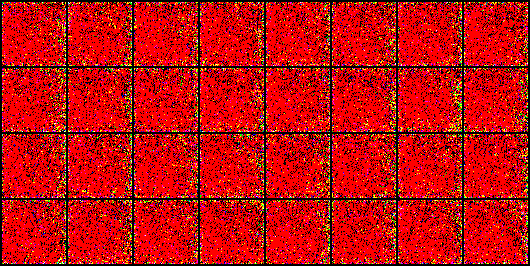

In [ ]:
generated_images = ddpm.generate_images_batch()
image_grid = make_grid(generated_images)
# convert to numpy
ndarr = image_grid.permute(1, 2, 0).to("cpu").numpy()
# and show
Image.fromarray(ndarr)

Видим, что сгенерированные изображения представляют собой шум.

Загрузим веса предобученной модели:


In [ ]:
!wget -q https://edunet.kea.su/repo/EduNet-content/L14/weights/unconditioned_baseline.pt

In [ ]:
ddpm._load_pretrained_model("unconditioned_baseline.pt")

0it [00:00, ?it/s]

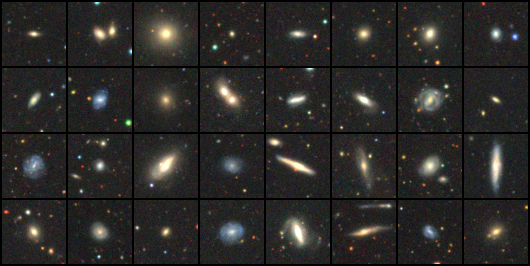

In [ ]:
generated_images = ddpm.generate_images_batch()
image_grid = make_grid(generated_images)
# convert to numpy
ndarr = image_grid.permute(1, 2, 0).to("cpu").numpy()
# and show
Image.fromarray(ndarr)

<font size="6">Использованная литература</font>

<font size="5">GAN</font>

[Книга по генеративным сетям](https://habr.com/ru/company/piter/blog/504956/)

[Generative Adversarial Networks (Goodfellow et al., 2014)](https://arxiv.org/abs/1406.2661)

[Видео разбор оригинальной статьи GAN](https://youtu.be/eyxmSmjmNS0)

[Видео лекции Иана Гудфеллоу](https://www.youtube.com/watch?v=HGYYEUSm-0Q)

[Generative adversarial networks](https://deepgenerativemodels.github.io/notes/gan/)

[Самые современные генеративные модели](https://paperswithcode.com/methods/category/generative-models)

[exactly how the NVIDIA GauGAN neural network works](https://sudonull.com/post/29972-Pictures-from-rough-sketches-how-exactly-the-NVIDIA-GauGAN-neural-network-works-ITSumma-Blog)

<font size="5">DCGAN</font>

[Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks (Radford et al., 2015)](https://arxiv.org/abs/1511.06434).

[DCGAN TUTORIAL](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html)

<font size="5">Wassserstein GAN</font>

[Wasserstein GAN (Arjovsky et. al., 2017)](https://arxiv.org/abs/1701.07875)

[Блог пост о Wasserstein GAN](https://vincentherrmann.github.io/blog/wasserstein/)

[Improved Training of Wasserstein GANs (Gulrajani et al., 2017)](https://arxiv.org/abs/1704.00028)

[Spectral Normalization for Generative Adversarial Networks (Miyato et al., 2018)](https://arxiv.org/abs/1802.05957).

<font size="5">ProGAN -> StyleGAN -> StyleGAN2 -> Alias-Free GAN</font>

[Progressive Growing of GANs for Improved Quality, Stability, and Variation (ProGAN) [Karras et al., 2017]](https://arxiv.org/abs/1710.10196)

[A Style-Based Generator Architecture for Generative Adversarial Networks (StyleGAN) [Karras et al., 2018]](https://arxiv.org/abs/1812.04948)

[Analyzing and Improving the Image Quality of StyleGAN (StyleGAN2) [Karras et al., 2019]](https://arxiv.org/abs/1912.04958)

[Alias-Free Generative Adversarial Networks (Alias-Free GAN) [Karras et al., 2021]](https://arxiv.org/abs/2106.12423)

<font size="5">Тонкости обучения GAN</font>

[Статья - детальный разбор тонкостей и советов](https://beckham.nz/2021/06/28/training-gans.html)

[Top-k Training of GANs: Improving GAN Performance by Throwing Away Bad Samples (Sinha et al., 2020)](https://arxiv.org/abs/2002.06224)

<font size="5">GAN Zoo:</font>

<font size="5">BigGAN</font>

[Large Scale GAN Training for High Fidelity Natural Image Synthesis (Brock et al., 2018)](https://arxiv.org/abs/1809.11096)

<font size="5">StackGAN</font>

[StackGAN: Text to Photo-realistic Image Synthesis with Stacked Generative Adversarial Networks (Zhang et al., 2016)](https://arxiv.org/abs/1612.03242).

Дополнительно: [репозиторий к статье с воспроизведением результатов](https://github.com/hanzhanggit/StackGAN).

[StackGAN++: Realistic Image Synthesis with Stacked Generative Adversarial Networks (Zhang et al., 2017)](https://arxiv.org/abs/1710.10916)

[Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial Network (Ledig et al., 2016)](https://arxiv.org/abs/1609.04802)

[Deep Learning Generative Models for Image Synthesis and Image Translation](https://www.rulit.me/data/programs/resources/pdf/Generative-Adversarial-Networks-with-Python_RuLit_Me_610886.pdf)

[youtube [StackGAN++] Realistic Image Synthesis with Stacked Generative Adversarial Networks | AISC](https://www.youtube.com/watch?v=PXWIaLE7_NU)

[youtube Text to Photo-realistic Image Synthesis with Stacked Generative Adversarial Networks](https://www.youtube.com/watch?v=crI5K4RCZws)

<font size="5">ControlGAN</font>

[Controllable Generative Adversarial Network](https://arxiv.org/pdf/1708.00598.pdf)

[Controllable Text-to-Image Generation](https://arxiv.org/pdf/1909.07083.pdf)

[Image Generation and Recognition (Emotions)](https://arxiv.org/pdf/1910.05774.pdf)

[Natural Language & Text-to-Image 2019](https://meta-guide.com/data/data-processing/text-to-image-systems/natural-language-text-to-image-2019)

<font size="5">AC-GAN</font>

[How to Develop an Auxiliary Classifier GAN (AC-GAN) From Scratch with Keras](https://machinelearningmastery.com/how-to-develop-an-auxiliary-classifier-gan-ac-gan-from-scratch-with-keras/)

Conditional Image Synthesis with Auxiliary Classifier GANs: [статья](https://arxiv.org/pdf/1610.09585.pdf), [репозиторий](https://github.com/clvrai/ACGAN-PyTorch)

[An Auxiliary Classifier Generative Adversarial Framework for Relation Extraction](https://arxiv.org/pdf/1909.05370.pdf)

[A Multi-Class Hinge Loss for Conditional GANs](https://openaccess.thecvf.com/content/WACV2021/papers/Kavalerov_A_Multi-Class_Hinge_Loss_for_Conditional_GANs_WACV_2021_paper.pdf)

<font size="5">Domain Transfer Network</font>

[Unsupervised Cross-Domain Image Generation (Taigma et al., 2016)](https://arxiv.org/abs/1611.02200)

<font size="5">Pix2Pix</font>

[Image-to-Image Translation with Conditional Adversarial Networks (Isola et al., 2016)](https://arxiv.org/abs/1611.07004)

<font size="5">Семантическая генерация</font>

[Learning to Generate Chairs, Tables and Cars
with Convolutional Networks (Dosovitskiy et al., 2017)](https://arxiv.org/abs/1411.5928)

<font size="5">Text to image</font>

[Text-to-Image Generation with Attention Based Recurrent Neural Networks (Zia et al., 2020)](https://arxiv.org/abs/2001.06658)

<font size="5">Image-to-Image</font>

[GANs N' Roses: Stable, Controllable, Diverse Image to Image Translation (Chong et al., 2021)](https://arxiv.org/abs/2106.06561)

[Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks (Zhu et al., 2017)](https://arxiv.org/abs/1703.10593)

<font size="5">Ссылки</font>

[GitHub MNIST CelebA cGAN cDCGAN](https://github.com/znxlwm/pytorch-MNIST-CelebA-cGAN-cDCGAN)

[GitHub Text-to-Photo realistic Image Synthesis with Stacked Generative Adversarial Networks](https://github.com/zeusm9/Text-to-Photo-realistic-Image-Synthesis-with-Stacked-Generative-Adversarial-Networks)

[GitHub ControlGAN](https://github.com/mrlibw/ControlGAN)

[GitHub ControlGAN-Tensorflow](https://github.com/taki0112/ControlGAN-Tensorflow)

[GitHub Keras-ACGan](https://github.com/lukedeo/keras-acgan)

[Множество примеров различных генераторов](https://thisxdoesnotexist.com)
